In [38]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import sklearn.datasets

In [5]:
data = sklearn.datasets.load_boston()

We build a linear model `b0 + X*b = y`. We want to minimize the squared error: `|y-Xb|^2`.
Thus we differentiate and set equal 0. `-2(y-Xb).T * X = 0`  
=> `-X.T y+X.TX b = 0`  
=> `b = (X.T X)^-1 X.T y`

In [33]:
def linear_regression(data, target):
    return np.linalg.inv(data.T @ data) @ data.T @ target
    

In [34]:
linear_regression(data.data, data.target)

array([ -9.16297843e-02,   4.86751203e-02,  -3.77930006e-03,
         2.85636751e+00,  -2.88077933e+00,   5.92521432e+00,
        -7.22447929e-03,  -9.67995240e-01,   1.70443393e-01,
        -9.38925373e-03,  -3.92425680e-01,   1.49832102e-02,
        -4.16972624e-01])

In [111]:
data.data.shape

(100, 1)

In [110]:
data, target = sklearn.datasets.make_regression(n_samples=100, n_features=1, noise=.5)

In [45]:
b = linear_regression(data, target)

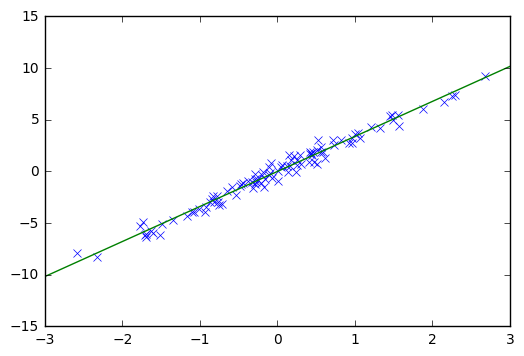

In [47]:
plt.plot(data, target, 'x')
plt.plot(np.linspace(-3,3,1000), b*np.linspace(-3,3,1000))

In [137]:
data = (np.random.random(100)*6 - 3)
target = np.sin(data) + np.random.randn(data.shape[0]) * 0.2
data = data.reshape(100, 1)

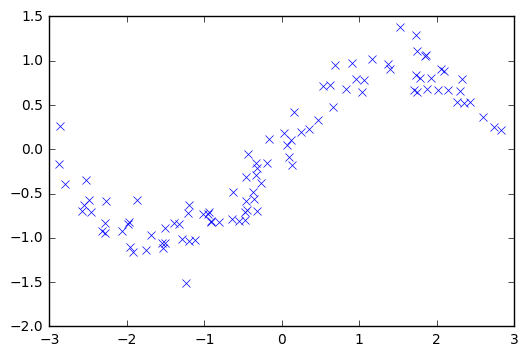

In [138]:
plt.plot(data, target, 'x')

In [139]:
b = linear_regression(data, target)

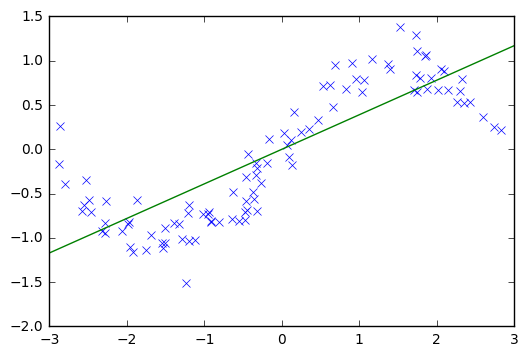

In [140]:
plt.plot(data, target, 'x')
plt.plot(np.linspace(-3,3,1000), b*np.linspace(-3,3,1000))

The data is not linear in the input space, but maybe in some features. Lets try cubic ones.

In [141]:
def cubic_features(data):
    d = data.T
    return np.array([d, d*d, d*d*d]).reshape(d.shape[0]*3, d.shape[1]).T

In [142]:
b = linear_regression(cubic_features(data), target)

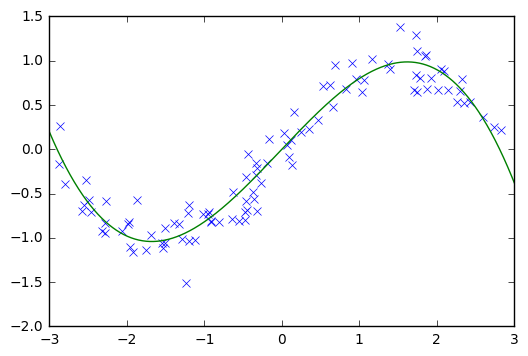

In [143]:
plt.plot(data, target, 'x')
plt.plot(np.linspace(-3,3,1000), np.sum(b * cubic_features(np.linspace(-3, 3, 1000).reshape(1000, 1)), 1))